In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import shutil
import torchvision

In [13]:
filepath = 'data/train/03-01-01-01-01-01-01.wav'
y, sr = librosa.load(filepath, sr=None)

y

array([0., 0., 0., ..., 0., 0., 0.], shape=(158558,), dtype=float32)

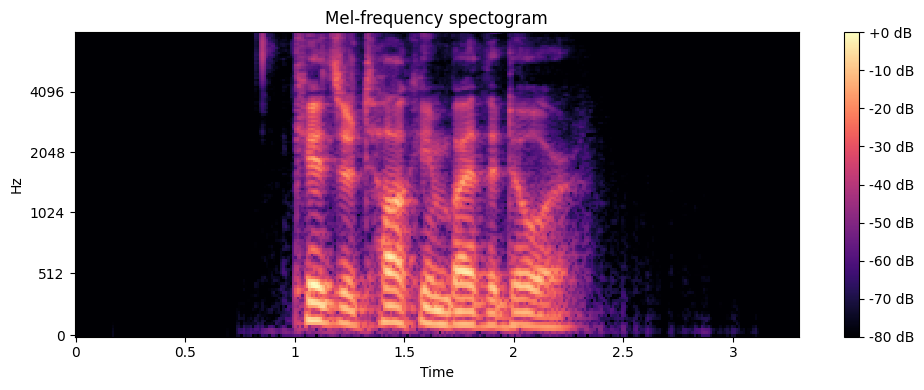

In [14]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectogram')
plt.tight_layout()
plt.show()

In [19]:
def get_emotion_label(filename):
    emotion_code = int(filename.split('-')[2])
    emotions = {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearful',
        7: 'disgust',
        8: 'surprised'
    }
    
    return emotions[emotion_code]

train_path = 'data/train/'
train_files = os.listdir(train_path)

df_train = pd.DataFrame({
    'File': train_files,
    'Emotion': [get_emotion_label(file) for file in train_files]
})

df_train

,File,Emotion
0,03-01-02-01-02-02-23.wav,calm
1,03-01-06-01-02-01-09.wav,fearful
2,03-01-02-02-02-02-23.wav,calm
3,03-01-01-01-01-01-15.wav,neutral
4,03-01-04-01-01-01-01.wav,sad
...,...,...
1435,03-01-02-02-02-01-22.wav,calm
1436,03-01-05-01-01-01-08.wav,angry
1437,03-01-05-02-02-01-23.wav,angry
1438,03-01-06-02-02-01-23.wav,fearful


In [ ]:
def save_spectogram(training_folder, filepath, outpath):
    emotion = get_emotion_label(filepath)
    y, sr = librosa.load(os.path.join(training_folder,filepath), sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(2.24, 2.24), dpi=100)
    librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None)
    plt.axis('off')
    filepath = filepath.replace(".wav",".png")
    outpath = os.path.join(outpath,emotion)
    os.makedirs(outpath, exist_ok=True)
    plt.savefig(os.path.join(outpath,filepath), bbox_inches='tight', pad_inches=0)
    plt.close()

outpath = 'data/training_spectograms/'

for file in train_files:
    save_spectogram(train_path, file, outpath)

In [29]:
def split_dataset(src, dest, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):

    for emotion in os.listdir(src):
        emotion_path = os.path.join(src,emotion)

        files = os.listdir(emotion_path)
        random.shuffle(files)

        n_total = len(files)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)

        splits = {
            'train': files[:n_train],
            'val' : files[n_train:n_train+n_val],
            'test' : files[n_train+n_val:]
        }

        for split_name, split_files in splits.items():
            emotion_dir = os.path.join(dest,split_name,emotion)
            os.makedirs(emotion_dir, exist_ok=True)

            for file in split_files:
                src_file = os.path.join(emotion_path,file)
                dest_file = os.path.join(emotion_dir, file)

                shutil.copyfile(src_file, dest_file)

split_dataset('data/training_spectograms/', 'data/split_training_data/')

In [ ]:
training_path = 'data/training_spectograms/train'

training_dataset = torchvision.datasets.ImageFolder(training_path)